In [7]:
import numpy as np
sim_results = open('./summary_processed.txt', 'r')
header = sim_results.readline().strip().split('\t')

data = []
for line in sim_results:
    row = line.strip().split('\t')
    data.append(row)

In [8]:
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt

In [9]:
header

['Simulation',
 'Replicate',
 'Abundances',
 'Error_type',
 'Poiss_error',
 'Output_dir',
 'num_true_pos_bc',
 'num_false_pos_bc',
 'num_fals_neg_bc',
 'bc_tpr',
 'bc_fpr']

In [22]:
get_col = lambda row, entry: row[header.index(entry)]

def get_entries(data, abundance, error_type, errors = None):
    select_entries = []
    for row in data:
        if(get_col(row, 'Error_type') == error_type and get_col(row, 'Abundances') == abundance):
            if(errors == None):
                select_entries.append(row)
            else:
                if(int(get_col(row, 'Poiss_error')) == errors):
                    select_entries.append(row)
    return select_entries
        


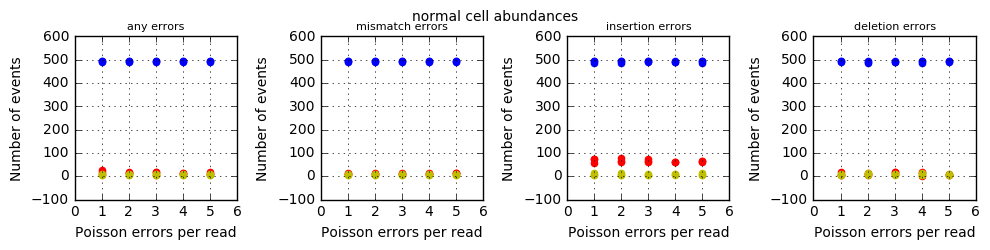

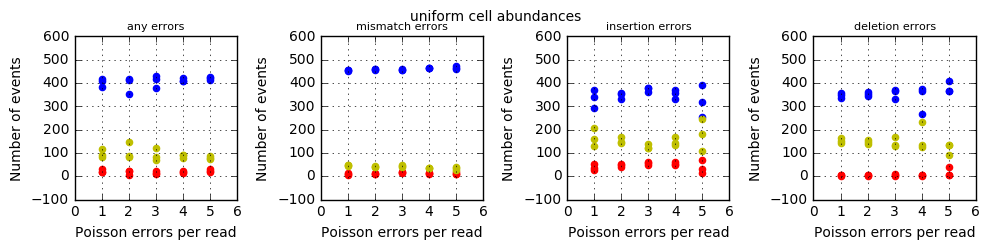

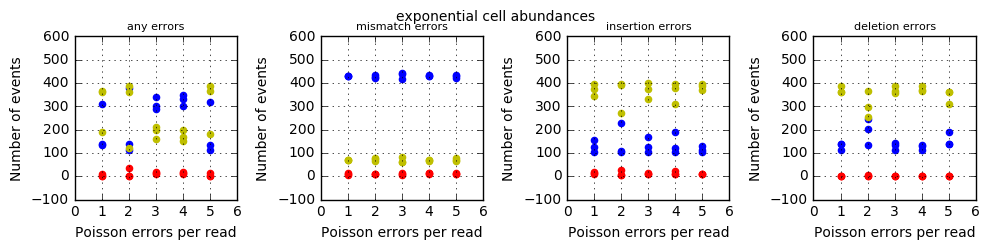

In [56]:
"""
plot poiss error (x) vs true pos, false pos, fase neg barcode calls
    separate subplots for each error type, abundance distr
"""
import itertools

abundances = ['normal', 'uniform', 'exponential']
error_type = ['any', 'mismatch', 'insertion', 'deletion']

for a in abundances:
    fig, ax_arr = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5))
    for (ax, e) in zip(ax_arr, error_type):
        select_entries = get_entries(data, a, e)

        x = [int(get_col(i, 'Poiss_error')) + 1 for i in select_entries]
        y1 = [int(get_col(i, 'num_true_pos_bc')) for i in select_entries]
        y2 = [int(get_col(i, 'num_false_pos_bc')) for i in select_entries]
        y3 = [int(get_col(i, 'num_fals_neg_bc')) for i in select_entries]
        
        ax.scatter(x, y1, color='b', label='True positives')
        ax.scatter(x, y2, color='r', label='False positives')
        ax.scatter(x, y3, color='y', label='False negatives')
        ax.set_title('%s errors' % e, fontsize=8)
        ax.set_xlabel('Poisson errors per read')
        ax.set_ylabel('Number of events')
        ax.grid()
        ax.set_ylim([-100, 600])
    fig.suptitle('%s cell abundances' % a)
    plt.tight_layout()
    

In [ ]:
"""
LABELS
    Blue: true positive
    Red: false positive
    Yellow: false negative

"""

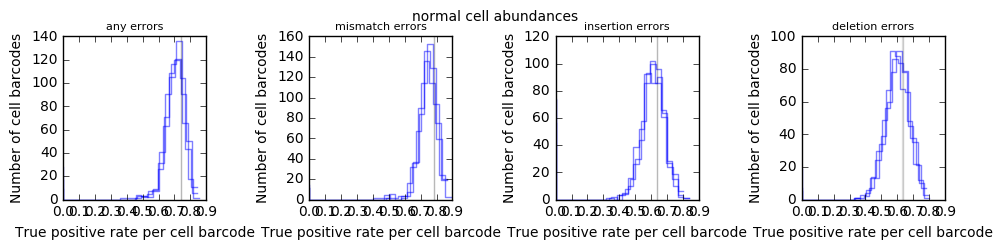

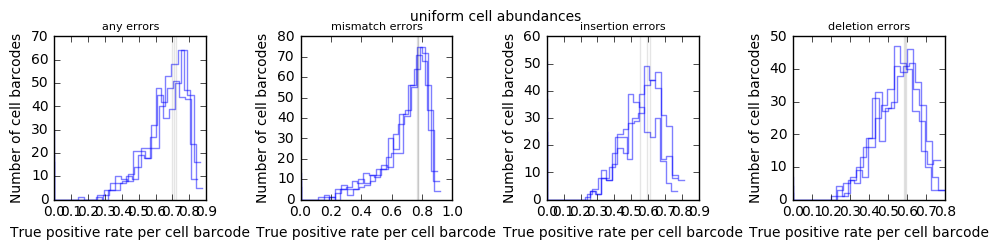

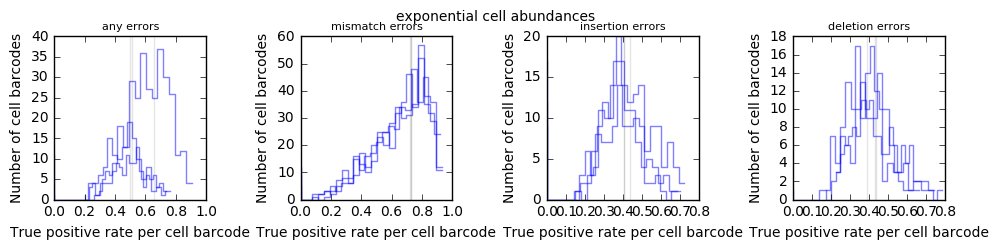

In [35]:
cmap = plt.get_cmap('jet', 20)

errors = [0]
for a in abundances:
    fig, ax_arr = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5))
    for (ax, e) in zip(ax_arr, error_type):
        
        for err_num in errors:
        
            select_entries = get_entries(data, a, e, errors=err_num)
            tpr_entries = [get_col(i, 'bc_tpr') for i in select_entries] 
        
            for (j, tpr_entry) in enumerate(tpr_entries):
                y_data = [float(i) for i in tpr_entry.split(',')]
                hist, bins = np.histogram(y_data, bins=25)
                ax.step(bins[0:-1], hist, alpha = 0.5, color = 'b')
                ax.axvline(np.median(y_data), color = 'k', alpha = 0.1)
            
        ax.set_title('%s errors' % e, fontsize=8)
        ax.set_xlabel('True positive rate per cell barcode')
        ax.set_ylabel('Number of cell barcodes')
    fig.suptitle('%s cell abundances' % a)
    plt.tight_layout()


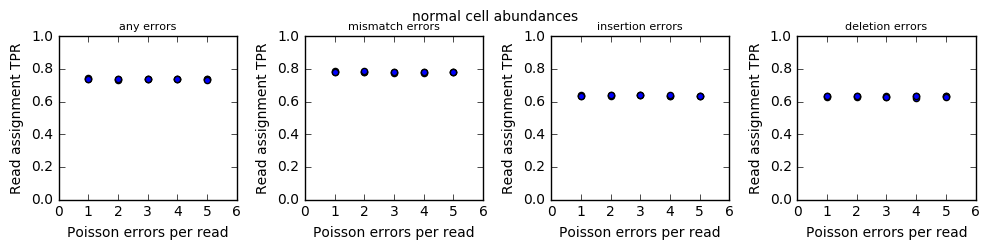

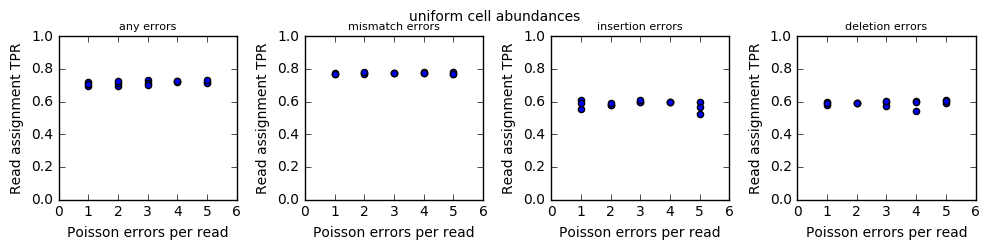

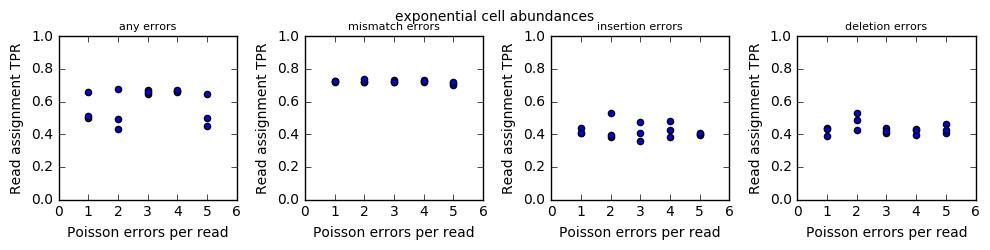

In [58]:
cmap = plt.get_cmap('jet', 20)

errors = [0, 1, 2, 3, 4]



for a in abundances:
    fig, ax_arr = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5))
    for (ax, e) in zip(ax_arr, error_type):
        x = []
        medians = []
        for err_num in errors:
        
            select_entries = get_entries(data, a, e, errors=err_num)
            tpr_entries = [get_col(i, 'bc_tpr') for i in select_entries] 
        
            for (j, tpr_entry) in enumerate(tpr_entries):
                y_data = [float(i) for i in tpr_entry.split(',')]
                
                x.append(err_num + 1)
                medians.append(np.median(y_data))
        ax.scatter(x, medians)
        ax.set_title('%s errors' % e, fontsize=8)
        ax.set_xlabel('Poisson errors per read')
        ax.set_ylabel('Read assignment TPR')
        ax.set_ylim([0, 1])
    fig.suptitle('%s cell abundances' % a)
    plt.tight_layout()